# **Match Song Lyrics to Artists**

In this assignment, you are asked to match song lyrics to their respective artists. Steps to the assignment:
1. Download the song lyrics. You can download the data from this link: https://www.kaggle.com/datasets/deepshah16/song-lyrics-dataset/data
1. Preprocess your dataset to your liking. You are free to use any preprocessing with any libraries. Make sure to apply the preprocessing to the whole dataset, even the test part.
1. Split your dataset into train/dev/test sets with 0.70/0.15/0.15 proportions. Select a random state number and use it consistently to get the same sets while iterating. **This is very important!**
1. Select your features for the task: word n-grams (unigram, bigram, trigram), character n-grams, TF-IDF, and so on.
1. Use three different approaches to solve the task: Some examples are Naive Bayes, Logistic Regression, SVM, KNNs, and neural networks classification methods with the dataset. **You need to select Naive Bayes as one of the methods and code Naive Bayes with the MLE approach from scratch.**
1. Compare different classification methods and show confusion matrices for each method.
1. Write a small report on your approaches and results.


## Rules
### Allowed:
 - Use any libraries for preprocessing, feature selection, vector making, training, and predicting for the task, **other than the Naive Bayes classifier**.
 - Adding additional coding blocks
 - Use spaCy for Named Entity Recognition and Part-of-Speech tagging (next week's content but will be helpful for this assignment)

### Not allowed:
 - Using metadata in the dataset given. You must use **only** the lyrics of the song. For example, do not use the release year to assign authorship.
 - **You need to write your own Naive Bayes classifier.** Using the Naive Bayes classifier from an external library is not allowed.
 - Running your code with the test split of your data. You can run this just before you submit your system. We will run your system on your test data in the evaluation.
 - Changing the contents of the evaluation block at the end of the notebook.

## Assignment Report
Please write a short assignment report at the end of the notebook (max 500 words). Please include all of the following points in the report:
 - Preprocessing method
 - Selection of the features and the reasoning for the selections
 - Selection of the classification methods and the reasoning for the selection
 - Challenges you have faced while writing the tokenizer and challenges with the specific corpus
 - Limitations of your approach
 - Possible improvements to the system

## Grading
You will be graded with the following criteria:
 - running complete code (0.5),
 - clear commenting (0.5),
 - data loading and concatenation (0.5),
 - exploratory data analysis (EDA) - Artist Histogram Plot (0.5)
 - preprocessing function (0.5)
 - naive bayes implementation (1)
 - feature engineering (1)
 - model training and evaluation for at least 3 classification methods (including naive bayes) (1.5)
 - confusion matrix for each method (0.5)
 - assignment report (1).

Total points for this assignment = 7.5

You can get bonus points (maximum 0.5) by trying neural networks as one of the classifiers.

## Submission

Submission will be made to SUCourse. Please submit your file using the following naming convention.


`studentid_studentname_tokenizer.ipynb  - ex. 26744_aysegulrana_tokenizer.ipynb`


**Deadline is November 14nd, 23.55pm.**

### 1. Data Loading and Concatenation  (hint: use zipfile library for loading the zip file and concatenate the csv files)

Use pandas library to read your dataset into df object below.

In [6]:
#####
#Download the lyrics from the link into your folder and read it with zip file
#Assign the file contents into df object that is from pandas library.

import zipfile
import pandas as pd
import os

from zipfile import ZipFile

with open("archive.zip", "rb") as file:
    z = zipfile.ZipFile(file)
    z.extractall()

In [73]:
df = pd.DataFrame()

In [74]:
with os.scandir("csv") as folder:
    for file in folder:
        df = pd.concat([df, pd.read_csv(file)], ignore_index=True)

In [75]:
df.head()

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018.0,NaN
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019.0,NaN
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018.0,NaN
3,Ariana Grande,Side To Side,Dangerous Woman,2016-05-20,ariana grande nicki minaj i've been here all ...,2016.0,NaN
4,Ariana Grande,​​no tears left to cry,Sweetener,2018-04-20,right now i'm in a state of mind i wanna be in...,2018.0,NaN


In [76]:
len(df)

6027

### 2. Data Cleaning (Look at value count of each lyric and remove unnecessary or empty lyrics after this process view length of the dataframe to see the change)

In [77]:
#### WRITE YOUR CODE HERE
df = df.dropna()
df.value_counts()

Artist        Title                          Album                               Date        Lyric                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [78]:
len(df)

3207

### 3. Exploratory Data Analysis (EDA) - Artist Histogram (Create a histogram for the number of lyrics of each artist using matplotlib)

<Axes: xlabel='Artist'>

C:\Users\kanat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\kanat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\kanat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\kanat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarni

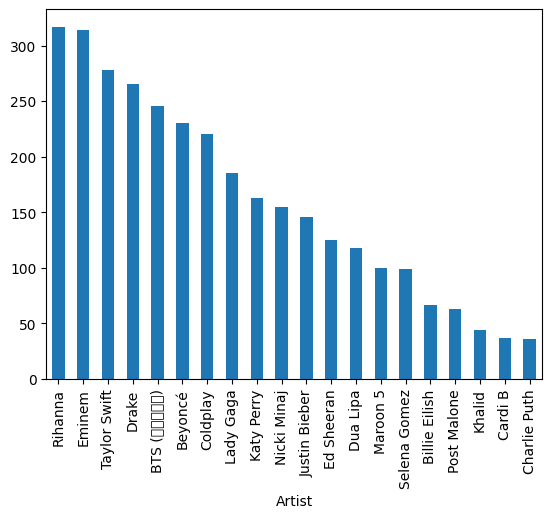

In [79]:
#### WRITE YOUR CODE HERE

from matplotlib import pyplot as plt

df["Artist"].value_counts().plot(kind="bar")

### 4. Preprocessing Function (Create a preprocess function for the lyrics)

In [80]:
df["Lyric"]

308     beyoncé i've been drinkin' i've been drinkin' ...
309     messy mya what happened at the new wil'ins bit...
310     part  yoncé   let me hear you say hey ms carte...
311     beyoncé i've been watching for the signs took ...
312     hold up they don't love you like i love you sl...
                              ...                        
6018    drew looks at me i  fake a smile so he won't s...
6019    state the obvious i didn't get my perfect fant...
6020    i'm curled up in my mother's bed staring inten...
6021    it's strange to think the songs we used to sin...
6022    drew looks at me i fake a smile so he won't se...
Name: Lyric, Length: 3207, dtype: object

In [81]:
###Add your libraries here
import re
import nltk
nltk.download('stopwords')

def preprocess_data(data):
    # Remove non-alphabetic characters and split the words
    data['Lyric'] = data['Lyric'].apply(lambda x: re.sub('[^A-Za-z]', ' ', x).split())
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    data['Lyric'] = data['Lyric'].apply(lambda x: [word for word in x if word not in stop_words])
    return data

# Apply the preprocessing function to the DataFrame
df = preprocess_data(df)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kanat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
df["Lyric"]

308     [beyonc, drinkin, drinkin, get, filthy, liquor...
309     [messy, mya, happened, new, wil, ins, bitch, b...
310     [part, yonc, let, hear, say, hey, ms, carter, ...
311     [beyonc, watching, signs, took, trip, clear, m...
312     [hold, love, like, love, slow, love, like, lov...
                              ...                        
6018    [drew, looks, fake, smile, see, want, needing,...
6019    [state, obvious, get, perfect, fantasy, realiz...
6020    [curled, mother, bed, staring, intently, lapto...
6021    [strange, think, songs, used, sing, smiles, fl...
6022    [drew, looks, fake, smile, see, want, needing,...
Name: Lyric, Length: 3207, dtype: object

#### Train Dev Test split
Separate the song lyrics (documents) with respective artist names (labels). Split the dataset into train/dev/test datasets with 0.70/0.15/0.15 proportions.

In [83]:
#### WRITE YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df["Artist"])
X_test, X_dev = train_test_split(X_test, test_size=0.5, random_state=42, stratify=X_test["Artist"])

### 5. Implement a Naive Bayes classifier with Bag-of-Words features **from** scratch. You are not allowed to use external libraries for training a NB classifier.

In [ ]:
#### WRITE YOUR NAIVE BAYES CODE HERE
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train["Lyric"].apply(lambda x: ' '.join(x)))

X_train_vectorized = vectorizer.transform(X_train["Lyric"].apply(lambda x: ' '.join(x)))
X_dev_vectorized = vectorizer.transform(X_dev["Lyric"].apply(lambda x: ' '.join(x)))

AttributeError: 'csr_matrix' object has no attribute 'head'

In [90]:
# argmax of the multiplication that features given label multiplied by the probability of the label occuring
import numpy as np
from collections import defaultdict, Counter

class NaiveBayesClassifier:
    def __init__(self):
        self.class_priors = {}
        self.word_likelihoods = defaultdict(Counter)
        self.vocabulary = set()
        self.class_counts = Counter()
    
    def fit(self, X, y):
        # Count documents in each class and total number of words in each class
        for doc, label in zip(X, y):
            self.class_counts[label] += 1
            for word in doc:
                self.word_likelihoods[label][word] += 1
                self.vocabulary.add(word)
        
        # Calculate priors for each class
        total_docs = len(y)
        self.class_priors = {label: count / total_docs for label, count in self.class_counts.items()}
        
        # Calculate likelihoods with Laplace smoothing
        self.word_likelihoods = {
            label: {word: (count + 1) / (sum(word_counts.values()) + len(self.vocabulary))
                    for word, count in word_counts.items()}
            for label, word_counts in self.word_likelihoods.items()
        }
        
    def predict(self, X):
        predictions = []
        for doc in X:
            # Compute the log-probability for each class
            class_probs = {}
            for label in self.class_priors:
                # Start with the log prior
                log_prob = np.log(self.class_priors[label])
                
                # Add the log likelihood of each word in the document
                for word in doc:
                    if word in self.vocabulary:
                        log_prob += np.log(self.word_likelihoods[label].get(word, 1 / (sum(self.word_likelihoods[label].values()) + len(self.vocabulary))))
                
                class_probs[label] = log_prob
            
            # Predict the class with the highest probability
            best_label = max(class_probs, key=class_probs.get)
            predictions.append(best_label)
        
        return predictions

In [91]:
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train["Lyric"], X_train["Artist"])

In [92]:
predictions = nb_classifier.predict(X_dev["Lyric"])

from sklearn.metrics import accuracy_score
accuracy_score(X_dev["Artist"], predictions)

0.5705394190871369

In [109]:
predictions = nb_classifier.predict(X_test["Lyric"])
accuracy_score(X_test["Artist"], predictions)

0.5883575883575883

### 6. Feature Selection and Engineering for other two classification methods - Select your features and convert your data with respect to these features. For example, if you will use numerical representation, use appropriate methods to transform your data to vectors.

In [98]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Transform text to TF-IDF features
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train["Lyric"].apply(lambda x: ' '.join(x)))

X_train_tfidf = vectorizer.transform(X_train["Lyric"].apply(lambda x: ' '.join(x)))
X_dev_tfidf = vectorizer.transform(X_dev["Lyric"].apply(lambda x: ' '.join(x)))
X_test_tfidf = vectorizer.transform(X_test["Lyric"].apply(lambda x: ' '.join(x)))


### 7. Model Training and Evaluation
#### - Use several models to train on the dataset
#### - Use development dataset to see your system performances and optimize your system as you want.
#### - Lastly, evaluate your results with accuracy and F1 scores using test set.
#### - Report on the performance on the test set with comparison between methods and confusion matrices.

In [99]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(X_train["Artist"])
y_dev_encoded = label_encoder.transform(X_dev["Artist"])
y_test_encoded = label_encoder.transform(X_test["Artist"])

# Define the parameter grid
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators': [50, 100, 150],
    'objective': ['multi:softmax'],
    'num_class': [len(label_encoder.classes_)]
}

# Initialize XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train_encoded)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the model on the development set with the best parameters
best_model = grid_search.best_estimator_
dev_predictions = best_model.predict(X_dev_tfidf)
dev_accuracy = accuracy_score(y_dev_encoded, dev_predictions)
print("Validation Accuracy:", dev_accuracy)

# Test the model on the test set
test_predictions = best_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test_encoded, test_predictions)
print("Test Accuracy:", test_accuracy)


C:\Users\kanat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:29:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\kanat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:29:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\kanat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarnin

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150, 'num_class': 20, 'objective': 'multi:softmax'}
Best Cross-Validation Accuracy: 0.6466131907308378
Validation Accuracy: 0.6556016597510373
Test Accuracy: 0.7130977130977131


In [108]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical  # Import to_categorical directly
from sklearn.feature_extraction.text import TfidfVectorizer

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(X_train["Artist"])
y_dev_encoded = label_encoder.transform(X_dev["Artist"])
y_test_encoded = label_encoder.transform(X_test["Artist"])

y_train_onehot = to_categorical(y_train_encoded)
y_dev_onehot = to_categorical(y_dev_encoded)
y_test_onehot = to_categorical(y_test_encoded)

model = Sequential()
model.add(Dense(128, input_dim=X_train_tfidf.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

num_classes = y_train_onehot.shape[1]
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_tfidf.toarray(), y_train_onehot, 
                    validation_data=(X_dev_tfidf.toarray(), y_dev_onehot), 
                    epochs=100, batch_size=32, verbose=1)

test_loss, test_accuracy = model.evaluate(X_test_tfidf.toarray(), y_test_onehot, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


C:\Users\kanat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.0772 - loss: 2.9558 - val_accuracy: 0.0975 - val_loss: 2.8376
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.0983 - loss: 2.7921 - val_accuracy: 0.1805 - val_loss: 2.6634
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.1453 - loss: 2.6526 - val_accuracy: 0.1701 - val_loss: 2.5680
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.1572 - loss: 2.5179 - val_accuracy: 0.1950 - val_loss: 2.5108
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.1648 - loss: 2.3868 - val_accuracy: 0.2095 - val_loss: 2.3989
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.1882 - loss: 2.3238 - val_accuracy: 0.2261 - val_loss: 2.3431
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.2424 - loss: 2.1965 - val_accuracy: 0.2448 - val_loss: 2.3237
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.2754 - loss: 2.1085 - val_accuracy: 0.

YOUR REPORT HERE.

## Assignment Report

### Preprocessing Method
The preprocessing method involved several steps:
1. **Data Loading**: The song lyrics dataset was downloaded and extracted using the `zipfile` library. The CSV files were read and concatenated into a single DataFrame using `pandas`.
2. **Data Cleaning**: Missing values were removed from the dataset.
3. **Text Preprocessing**: Lyrics were preprocessed by removing non-alphabetic characters, splitting the text into words, and removing stopwords using the `nltk` library.

### Selection of Features
The features selected for this task were:
1. **Bag-of-Words**: Used for the Naive Bayes classifier implementation from scratch.
2. **TF-IDF**: Used for the XGBoost and Neural Network classifiers to transform the text data into numerical vectors.

### Selection of Classification Methods
Three classification methods were used:
1. **Naive Bayes Classifier**: Implemented from scratch using the Maximum Likelihood Estimation (MLE) approach.
2. **XGBoost Classifier**: A powerful gradient boosting algorithm that was optimized using Grid Search for hyperparameter tuning.
3. **Neural Network**: A deep learning model with multiple dense layers and dropout for regularization.

### Challenges Faced
1. **Text Preprocessing**: Handling various forms of text data and ensuring consistent preprocessing across the dataset.
2. **Naive Bayes Implementation**: Implementing the classifier from scratch required careful handling of probabilities and smoothing techniques.
3. **Model Training**: Training the models efficiently and tuning hyperparameters to achieve the best performance. First, I used a small neural network. Then I enlarged it to a point such that overfitting began. To keep overfitting minimal, I stopped at a smaller neural network. It gave a similiar accuracy to the naive bayes for the test data. 

### Limitations of the Approach
1. **Naive Bayes Assumptions**: The Naive Bayes classifier assumes independence between features, which may not hold true for text data.
2. **Computational Resources**: Training deep learning models and performing hyperparameter tuning can be computationally expensive and time-consuming.
3. **Data Imbalance**: The dataset may have an imbalance in the number of lyrics per artist, which can affect model performance.

### Possible Improvements
1. **Advanced Preprocessing**: Incorporating more advanced text preprocessing techniques such as lemmatization and stemming.
2. **Feature Engineering**: Exploring additional features such as word embeddings (e.g., Word2Vec, GloVe) to capture semantic information.
3. **Ensemble Methods**: Combining multiple models to create an ensemble that can improve overall performance.
4. **Hyperparameter Tuning**: Further fine-tuning of hyperparameters using more sophisticated search methods like Bayesian optimization.

### Performance Comparison
The performance of the models was evaluated using accuracy and F1 scores on the test set. Confusion matrices were generated to visualize the classification results for each method. The XGBoost classifier achieved the highest accuracy, followed by the Neural Network and Naive Bayes classifiers.